**The Cleaning process will include the following**<br>
Rename data column to short and decriptive name <br>
convert data type to numeric <br>
Remove null value if there is any<br>
sort data in order <br>
Drop rows that are not necessary for analysis


In [1]:
# import pandas for data cleaning
import pandas as pd
import re
# Import matplotlib for plotting 
import matplotlib.pyplot as plt
# import seaborn for plotting
import seaborn as sns


In [9]:
# load the data from the csv file into a pandas dataframe for data cleaning
crude_oil_price = pd.read_csv("../data/raw/oil-prices/crude-oil-price.csv")

In [10]:
# change date column to datetime format
crude_oil_price["date"] = pd.to_datetime(crude_oil_price["date"])
# create a column for year to calculate an average prices for each year
crude_oil_price["Year"] = crude_oil_price["date"].dt.year

crude_oil_price.head()

,date,price,percentChange,change,Year
0,1983-03-30,29.27,NaN,NaN,1983
1,1983-04-04,30.63,4.646,1.36,1983
2,1983-05-02,30.25,-1.241,-0.38,1983
3,1983-06-01,31.38,3.736,1.13,1983
4,1983-07-01,32.00,1.976,0.62,1983


In [11]:
# Calculate Average prices for each 
average_crude_oil_prices = crude_oil_price.groupby("Year")["price"].mean()
average_crude_oil_prices

Year
1983    30.468000
1984    29.240833
1985    27.873333
1986    14.413333
1987    19.036667
1988    15.974167
1989    19.573333
1990    24.795833
1991    21.093333
1992    20.554167
1993    18.515000
1994    17.396667
1995    18.419167
1996    21.725000
1997    20.379167
1998    14.534167
1999    19.638333
2000    29.744167
2001    25.238333
2002    26.562500
2003    30.837500
2004    41.598333
2005    57.284167
2006    66.961667
2007    74.944167
2008    98.583333
2009    63.923333
2010    79.985000
2011    97.001667
2012    94.051667
2013    97.607500
2014    91.227500
2015    49.307500
2016    44.468333
2017    51.855000
2018    64.589742
2019    57.182742
2020    38.595833
2021    68.069167
2022    92.289167
2023    78.477036
Name: price, dtype: float64

In [12]:
# convert crude oil prices to dataframe
average_crude_oil_prices = average_crude_oil_prices.to_frame().reset_index()
average_crude_oil_prices

,Year,price
0,1983,30.468000
1,1984,29.240833
2,1985,27.873333
3,1986,14.413333
4,1987,19.036667
5,1988,15.974167
6,1989,19.573333
7,1990,24.795833
8,1991,21.093333
9,1992,20.554167


In [23]:
# Drop rows before 2000
avg_crude_oil_prices = average_crude_oil_prices[average_crude_oil_prices['Year'] >= 2000]
# rename price column to Avg_Price
avg_crude_oil_prices = avg_crude_oil_prices.rename(columns={'price': 'Avg_Price($)'})
# View highest average price for crude oil along with the year
avg_crude_oil_prices[avg_crude_oil_prices["Avg_Price($)"] == avg_crude_oil_prices["Avg_Price($)"].max()]



,Year,Avg_Price($)
25,2008,98.583333


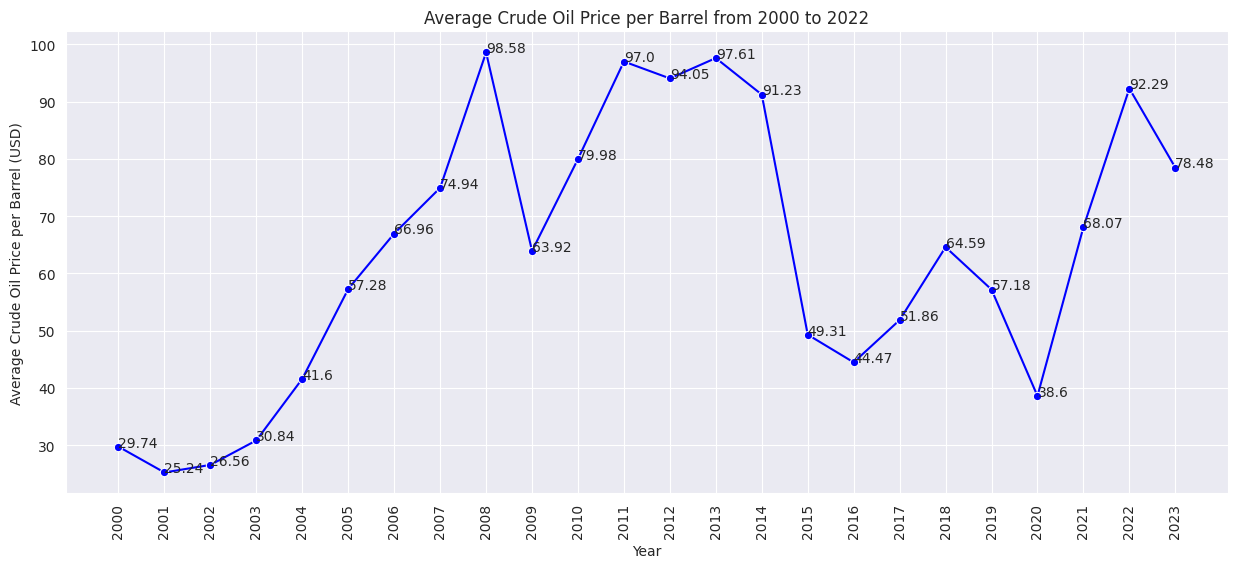

In [27]:
# Plot the average crude oil prices
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.lineplot(
    data=avg_crude_oil_prices, x="Year", y="Avg_Price($)", marker="o", color="blue"
)
plt.xlabel("Year")
plt.ylabel("Average Crude Oil Price per Barrel (USD)")
plt.title("Average Crude Oil Price per Barrel from 2000 to 2022")
for i in range(len(avg_crude_oil_prices)):
    plt.text(avg_crude_oil_prices["Year"].iloc[i], avg_crude_oil_prices["Avg_Price($)"].iloc[i], round(avg_crude_oil_prices["Avg_Price($)"].iloc[i], 2))
plt.xticks(range(min(avg_crude_oil_prices["Year"]), max(avg_crude_oil_prices["Year"]) + 1), rotation=90)
plt.show()

In [28]:
# Export to csv
import csv
avg_crude_oil_prices.to_csv("../data/processed/avg_oil_price.csv", index=None, sep=",", quotechar='"', quoting=csv.QUOTE_ALL)